In [459]:
import pandas as pd
import numpy as np

### Extração do Arquivo Tratado

Descrição:
  - Carregue o arquivo CSV que contém os dados tratados anteriormente.
📂 Atenção: Utilize o mesmo arquivo que você limpou e organizou na parte 1 do desafio Telecom X. Ele deve conter somente as colunas relevantes, já com os dados corrigidos e padronizados.

In [460]:
# Carregue o arquivo CSV que contém os dados tratados anteriormente. 
dados = pd.read_csv('dados.csv')

dados

,ID_Cliente,Evasao,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Tempo_De_Contrato_Meses,Servico_Telefonico,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Contas_Diarias
0,0002-ORFBO,0.0,feminino,0,1,1,9,1,0.0,dsl,...,0.0,1.0,1.0,0.0,anual (1 ano),1,cheque enviado por correio,65.60,593.30,2.186667
1,0003-MKNFE,0.0,masculino,0,0,0,9,1,1.0,dsl,...,0.0,0.0,0.0,1.0,mensal,0,cheque enviado por correio,59.90,542.40,1.996667
2,0004-TLHLJ,1.0,masculino,0,0,0,4,1,0.0,fibra óptica,...,1.0,0.0,0.0,0.0,mensal,1,cheque eletrônico,73.90,280.85,2.463333
3,0011-IGKFF,1.0,masculino,1,1,0,13,1,0.0,fibra óptica,...,1.0,0.0,1.0,1.0,mensal,1,cheque eletrônico,98.00,1237.85,3.266667
4,0013-EXCHZ,1.0,feminino,1,1,0,3,1,0.0,fibra óptica,...,0.0,1.0,1.0,0.0,mensal,1,cheque enviado por correio,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,0.0,feminino,0,0,0,13,1,0.0,dsl,...,0.0,1.0,0.0,0.0,anual (1 ano),0,cheque enviado por correio,55.15,742.90,1.838333
7252,9992-RRAMN,1.0,masculino,0,1,0,22,1,1.0,fibra óptica,...,0.0,0.0,0.0,1.0,mensal,1,cheque eletrônico,85.10,1873.70,2.836667
7253,9992-UJOEL,0.0,masculino,0,0,0,2,1,0.0,dsl,...,0.0,0.0,0.0,0.0,mensal,1,cheque enviado por correio,50.30,92.75,1.676667
7254,9993-LHIEB,0.0,masculino,0,1,1,67,1,0.0,dsl,...,1.0,1.0,0.0,1.0,bienal (2 anos),0,cheque enviado por correio,67.85,4627.65,2.261667


#### Remoção de Colunas Irrelevantes
Descrição:

- Elimine colunas que não trazem valor para a análise ou para os modelos preditivos, como identificadores únicos (por exemplo, o ID do cliente). Essas colunas não ajudam na previsão da evasão e podem até prejudicar o desempenho dos modelos.

In [461]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               7256 non-null   object 
 1   Evasao                   7256 non-null   float64
 2   Genero                   7256 non-null   object 
 3   Idoso                    7256 non-null   int64  
 4   Possui_Conjuge           7256 non-null   int64  
 5   Possui_Dependentes       7256 non-null   int64  
 6   Tempo_De_Contrato_Meses  7256 non-null   int64  
 7   Servico_Telefonico       7256 non-null   int64  
 8   Multiplas_Linhas         7256 non-null   float64
 9   Tipo_Internet            7256 non-null   object 
 10  Seguranca_Online         7256 non-null   float64
 11  Backup_Online            7256 non-null   float64
 12  Protecao_Dispositivo     7256 non-null   float64
 13  Suporte_Tecnico          7256 non-null   float64
 14  Streaming_TV            

In [462]:
dados_irrelevante = ['ID_Cliente', 'Multiplas_Linhas', 'Protecao_Dispositivo',
                     'Seguranca_Online', 'Backup_Online', 'Suporte_Tecnico']

In [463]:
dados = dados.drop(columns=dados_irrelevante)

In [464]:
dados.columns

Index(['Evasao', 'Genero', 'Idoso', 'Possui_Conjuge', 'Possui_Dependentes',
       'Tempo_De_Contrato_Meses', 'Servico_Telefonico', 'Tipo_Internet',
       'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Papel',
       'Metodo_Pagamento', 'Cobranca_Mensal', 'Cobranca_Total',
       'Contas_Diarias'],
      dtype='object')

In [465]:
dados

,Evasao,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Tempo_De_Contrato_Meses,Servico_Telefonico,Tipo_Internet,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Contas_Diarias
0,0.0,feminino,0,1,1,9,1,dsl,1.0,0.0,anual (1 ano),1,cheque enviado por correio,65.60,593.30,2.186667
1,0.0,masculino,0,0,0,9,1,dsl,0.0,1.0,mensal,0,cheque enviado por correio,59.90,542.40,1.996667
2,1.0,masculino,0,0,0,4,1,fibra óptica,0.0,0.0,mensal,1,cheque eletrônico,73.90,280.85,2.463333
3,1.0,masculino,1,1,0,13,1,fibra óptica,1.0,1.0,mensal,1,cheque eletrônico,98.00,1237.85,3.266667
4,1.0,feminino,1,1,0,3,1,fibra óptica,1.0,0.0,mensal,1,cheque enviado por correio,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,feminino,0,0,0,13,1,dsl,0.0,0.0,anual (1 ano),0,cheque enviado por correio,55.15,742.90,1.838333
7252,1.0,masculino,0,1,0,22,1,fibra óptica,0.0,1.0,mensal,1,cheque eletrônico,85.10,1873.70,2.836667
7253,0.0,masculino,0,0,0,2,1,dsl,0.0,0.0,mensal,1,cheque enviado por correio,50.30,92.75,1.676667
7254,0.0,masculino,0,1,1,67,1,dsl,0.0,1.0,bienal (2 anos),0,cheque enviado por correio,67.85,4627.65,2.261667


In [466]:
x = dados.drop('Evasao', axis=1)
y = dados['Evasao']

In [467]:
colunas = x.columns

### Encoding

Descrição:
  - Transforme as variáveis categóricas em formato numérico para torná-las compatíveis com algoritmos de machine learning. Utilize um método de codificação adequado, como o one-hot encoding.

In [468]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [469]:
one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary', sparse_output=False),
     ['Genero', 'Tipo_Internet', 'Tipo_Contrato', 'Metodo_Pagamento']),
    remainder='passthrough', sparse_threshold=0
)

In [470]:
x = one_hot.fit_transform(x)

In [471]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__Genero_masculino',
       'onehotencoder__Tipo_Internet_dsl',
       'onehotencoder__Tipo_Internet_fibra óptica',
       'onehotencoder__Tipo_Internet_sem internet',
       'onehotencoder__Tipo_Contrato_anual (1 ano)',
       'onehotencoder__Tipo_Contrato_bienal (2 anos)',
       'onehotencoder__Tipo_Contrato_mensal',
       'onehotencoder__Metodo_Pagamento_cartão de crédito automático',
       'onehotencoder__Metodo_Pagamento_cheque eletrônico',
       'onehotencoder__Metodo_Pagamento_cheque enviado por correio',
       'onehotencoder__Metodo_Pagamento_débito automático em conta',
       'remainder__Idoso', 'remainder__Possui_Conjuge',
       'remainder__Possui_Dependentes',
       'remainder__Tempo_De_Contrato_Meses',
       'remainder__Servico_Telefonico', 'remainder__Streaming_TV',
       'remainder__Streaming_Filmes', 'remainder__Fatura_Papel',
       'remainder__Cobranca_Mensal', 'remainder__Cobranca_Total',
       'remainder__Contas_Diarias'], dtype=object

In [472]:
pd.DataFrame(x, columns=one_hot.get_feature_names_out(colunas))

,onehotencoder__Genero_masculino,onehotencoder__Tipo_Internet_dsl,onehotencoder__Tipo_Internet_fibra óptica,onehotencoder__Tipo_Internet_sem internet,onehotencoder__Tipo_Contrato_anual (1 ano),onehotencoder__Tipo_Contrato_bienal (2 anos),onehotencoder__Tipo_Contrato_mensal,onehotencoder__Metodo_Pagamento_cartão de crédito automático,onehotencoder__Metodo_Pagamento_cheque eletrônico,onehotencoder__Metodo_Pagamento_cheque enviado por correio,...,remainder__Possui_Conjuge,remainder__Possui_Dependentes,remainder__Tempo_De_Contrato_Meses,remainder__Servico_Telefonico,remainder__Streaming_TV,remainder__Streaming_Filmes,remainder__Fatura_Papel,remainder__Cobranca_Mensal,remainder__Cobranca_Total,remainder__Contas_Diarias
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,9.0,1.0,1.0,0.0,1.0,65.60,593.30,2.186667
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,9.0,1.0,0.0,1.0,0.0,59.90,542.40,1.996667
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,4.0,1.0,0.0,0.0,1.0,73.90,280.85,2.463333
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,13.0,1.0,1.0,1.0,1.0,98.00,1237.85,3.266667
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,1.0,1.0,0.0,1.0,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,13.0,1.0,0.0,0.0,0.0,55.15,742.90,1.838333
7252,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,22.0,1.0,0.0,1.0,1.0,85.10,1873.70,2.836667
7253,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,2.0,1.0,0.0,0.0,1.0,50.30,92.75,1.676667
7254,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,67.0,1.0,0.0,1.0,0.0,67.85,4627.65,2.261667


### Verificação da Proporção de Evasão

Descrição:
  - Calcule a proporção de clientes que evadiram em relação aos que permaneceram ativos. Avalie se há desequilíbrio entre as classes, o que pode impactar modelos preditivos e a análise de resultados.

In [473]:
proporcao_evasao = y.value_counts(normalize=True)

In [474]:
print(proporcao_evasao)
print('\nProporção em percentual:')
print(proporcao_evasao * 100)

Evasao
0.0    0.74242
1.0    0.25758
Name: proportion, dtype: float64

Proporção em percentual:
Evasao
0.0    74.242007
1.0    25.757993
Name: proportion, dtype: float64


### Separação de Dados
Descrição:
  - Divida o conjunto de dados em treino e teste para avaliar o desempenho do modelo. Uma divisão comum é 70% para treino e 30% para teste, ou 80/20, dependendo do tamanho da base de dados.

In [475]:
from sklearn.model_selection import train_test_split

In [476]:
x_treino, x_teste, y_treino, y_teste = train_test_split(
    x, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

###  Normalização ou Padronização (se necessário)

Descrição:
  - Avalie a necessidade de normalizar ou padronizar os dados, conforme os modelos que serão aplicados.
Modelos baseados em distância, como KNN, SVM, Regressão Logística e Redes Neurais, requerem esse pré-processamento.
Já modelos baseados em árvore, como Decision Tree, Random Forest e XGBoost, não são sensíveis à escala dos dados.

In [477]:
from sklearn.preprocessing import MinMaxScaler

In [478]:
normalizado = MinMaxScaler()

# Ajusta e transforma os dados de treino
x_treino_normalizado = normalizado.fit_transform(x_treino)

# Transforma os dados de teste com o mesmo scaler
x_teste_normalizado = normalizado.transform(x_teste)

In [479]:
nomes_colunas = one_hot.get_feature_names_out(colunas).tolist()

In [480]:
x_treino_normalizado_df = pd.DataFrame(
    x_treino_normalizado, columns=nomes_colunas)

x_treino_normalizado_df

,onehotencoder__Genero_masculino,onehotencoder__Tipo_Internet_dsl,onehotencoder__Tipo_Internet_fibra óptica,onehotencoder__Tipo_Internet_sem internet,onehotencoder__Tipo_Contrato_anual (1 ano),onehotencoder__Tipo_Contrato_bienal (2 anos),onehotencoder__Tipo_Contrato_mensal,onehotencoder__Metodo_Pagamento_cartão de crédito automático,onehotencoder__Metodo_Pagamento_cheque eletrônico,onehotencoder__Metodo_Pagamento_cheque enviado por correio,...,remainder__Possui_Conjuge,remainder__Possui_Dependentes,remainder__Tempo_De_Contrato_Meses,remainder__Servico_Telefonico,remainder__Streaming_TV,remainder__Streaming_Filmes,remainder__Fatura_Papel,remainder__Cobranca_Mensal,remainder__Cobranca_Total,remainder__Contas_Diarias
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.901408,1.0,0.0,0.0,1.0,0.672311,0.654241,0.672311
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.098592,1.0,1.0,0.0,1.0,0.650398,0.076304,0.650398
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.013944,0.000098,0.013944
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.057271,0.000600,0.057271
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.112676,1.0,1.0,1.0,0.0,0.709163,0.096273,0.709163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5074,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.169014,1.0,1.0,1.0,1.0,0.766932,0.140186,0.766932
5075,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.450704,1.0,0.0,0.0,1.0,0.330677,0.200796,0.330677
5076,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,1.0,0.0,0.0,1.0,0.527888,0.006052,0.527888
5077,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.056338,0.0,1.0,1.0,1.0,0.325697,0.024302,0.325697


In [481]:
x_teste_normalizado_df = pd.DataFrame(
    x_teste_normalizado, columns=nomes_colunas)

x_teste_normalizado_df

,onehotencoder__Genero_masculino,onehotencoder__Tipo_Internet_dsl,onehotencoder__Tipo_Internet_fibra óptica,onehotencoder__Tipo_Internet_sem internet,onehotencoder__Tipo_Contrato_anual (1 ano),onehotencoder__Tipo_Contrato_bienal (2 anos),onehotencoder__Tipo_Contrato_mensal,onehotencoder__Metodo_Pagamento_cartão de crédito automático,onehotencoder__Metodo_Pagamento_cheque eletrônico,onehotencoder__Metodo_Pagamento_cheque enviado por correio,...,remainder__Possui_Conjuge,remainder__Possui_Dependentes,remainder__Tempo_De_Contrato_Meses,remainder__Servico_Telefonico,remainder__Streaming_TV,remainder__Streaming_Filmes,remainder__Fatura_Papel,remainder__Cobranca_Mensal,remainder__Cobranca_Total,remainder__Contas_Diarias
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.028169,0.0,0.0,1.0,1.0,0.168327,0.009341,0.168327
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.422535,1.0,1.0,0.0,0.0,0.794821,0.353485,0.794821
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,1.0,0.0,0.0,1.0,0.566235,0.006497,0.566235
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.140845,1.0,0.0,0.0,0.0,0.326195,0.064955,0.326195
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.915493,1.0,0.0,0.0,1.0,0.557769,0.558556,0.557769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.211268,1.0,0.0,0.0,0.0,0.007968,0.035524,0.007968
2173,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.859155,1.0,0.0,0.0,1.0,0.009462,0.127492,0.009462
2174,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.464789,1.0,1.0,1.0,1.0,0.911853,0.411776,0.911853
2175,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.802817,1.0,1.0,1.0,1.0,0.657869,0.565151,0.657869



## Criação de Modelos
Descrição
Crie pelo menos dois modelos diferentes para prever a evasão de clientes.

Um modelo pode exigir normalização, como Regressão Logística ou KNN.

O outro modelo pode não exigir normalização, como Árvore de Decisão ou Random Forest.

💡 A escolha de aplicar ou não a normalização depende dos modelos selecionados. Ambos os modelos podem ser criados sem normalização, mas a combinação de modelos com e sem normalização também é uma opção.

Justifique a escolha de cada modelo e, se optar por normalizar os dados, explique a necessidade dessa etapa

## Aplicando modelo KNN 



#### Modelos Utilizados para Previsão da Evasão

Justificativa:
- O KNN é um algoritmo de classificação baseado na proximidade entre pontos. Ele verifica quais instâncias de treinamento estão mais próximas da nova amostra para decidir a qual classe ela pertence.

- Necessidade de Normalização:
Como o KNN utiliza distâncias (geralmente euclidiana) para determinar os vizinhos mais próximos, atributos com escalas maiores influenciam mais na decisão, o que pode distorcer os resultados. Por isso, é fundamental aplicar a normalização (como o MinMaxScaler) para que todas as variáveis estejam na mesma escala (geralmente entre 0 e 1).

#### Vantagens:
- Fácil de entender e implementar.

- Funciona bem com dados normalizados.

- Útil em situações com classes balanceadas.

In [482]:
from sklearn.neighbors import KNeighborsClassifier


In [483]:
knn = KNeighborsClassifier()

In [484]:
knn.fit(x_treino_normalizado, y_treino)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [485]:
x_teste_normalizado = normalizado.transform(x_teste)

In [486]:
score = knn.score(x_teste_normalizado, y_teste)
print(f"Acurácia do modelo KNN: {score:.4f}")

Acurácia do modelo KNN: 0.7616


## Modelo 1
### Aplicando Modelo SVM

In [487]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [488]:
svm = SVC(kernel='rbf', C=1.0, random_state=42)
svm.fit(x_treino_normalizado, y_treino)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [489]:
y_pred_svm = svm.predict(x_teste_normalizado)

In [490]:
print(f"Acurácia SVM: {svm.score(x_teste_normalizado, y_teste):.4f}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste, y_pred_svm))

Acurácia SVM: 0.8020

Matriz de Confusão:
[[1465  151]
 [ 280  281]]


In [491]:
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_svm))


Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1616
         1.0       0.65      0.50      0.57       561

    accuracy                           0.80      2177
   macro avg       0.75      0.70      0.72      2177
weighted avg       0.79      0.80      0.79      2177



### Aplicando modelo Regressão Logística 

In [492]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [493]:
# Instancia e treina
modelo_log = LogisticRegression(random_state=42, max_iter=1000)
modelo_log.fit(x_treino_normalizado, y_treino)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [494]:
# Previsões
y_pred_log = modelo_log.predict(x_teste_normalizado)

In [495]:
# Avaliação
print(
    f"Acurácia (Regressão Logística): {modelo_log.score(x_teste_normalizado, y_teste):.4f}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste, y_pred_log))
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_log))

Acurácia (Regressão Logística): 0.8002

Matriz de Confusão:
[[1455  161]
 [ 274  287]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1616
         1.0       0.64      0.51      0.57       561

    accuracy                           0.80      2177
   macro avg       0.74      0.71      0.72      2177
weighted avg       0.79      0.80      0.79      2177



### Aplicando modelo Redes Neurais

In [496]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [497]:
# Instancia e treina a rede neural
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(x_treino_normalizado, y_treino)

,hidden_layer_sizes,"(100,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,42


In [498]:
# Previsões
y_pred_mlp = mlp.predict(x_teste_normalizado)

In [499]:
# Avaliação
print(
    f"Acurácia (Rede Neural - MLP): {mlp.score(x_teste_normalizado, y_teste):.4f}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste, y_pred_mlp))
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_mlp))

Acurácia (Rede Neural - MLP): 0.7993

Matriz de Confusão:
[[1473  143]
 [ 294  267]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1616
         1.0       0.65      0.48      0.55       561

    accuracy                           0.80      2177
   macro avg       0.74      0.69      0.71      2177
weighted avg       0.79      0.80      0.79      2177



### Aplicando modelo Dummy 

In [500]:
from sklearn.dummy import DummyClassifier

In [501]:
# Modelo Dummy 
modelo_dummy = DummyClassifier(strategy='most_frequent')
modelo_dummy.fit(x_treino, y_treino)
dummy_pred = modelo_dummy.predict(x_teste)

In [502]:
print("\nModelo Dummy Treinado:")
print(f"Acurácia Dummy: {modelo_dummy.score(x_teste, y_teste):.4f}")


Modelo Dummy Treinado:
Acurácia Dummy: 0.7423


### Aplicando modelo Árvore de Decisão

In [503]:
from sklearn.tree import DecisionTreeClassifier

In [504]:
# Árvore de Decisão (sem normalização)
modelo_dt = DecisionTreeClassifier(random_state=42)
modelo_dt.fit(x_treino, y_treino)
dt_pred = modelo_dt.predict(x_teste)

In [505]:
 # modelo treinado
print("\nModelo Random Forest Treinado:")
print(f"Acurácia Random Forest: {modelo_rf.score(x_teste, y_teste):.4f}")


Modelo Random Forest Treinado:
Acurácia Random Forest: 0.7859


## Modelo 2
### Aplicando modelo  Random Forest

Random Forest
Justificativa:
A Random Forest é um ensemble de Árvores de Decisão. Ela realiza a classificação combinando várias árvores que votam para decidir a saída final. Por se basear em divisões nos dados (condições do tipo feature < valor), ela não depende da escala das variáveis, tornando a normalização desnecessária.

Não é necessário normalizar:
- O algoritmo é invariante à escala dos dados, o que simplifica o pipeline de processamento.

Vantagens:
- Lida bem com variáveis categóricas e contínuas.

- Robusto a overfitting, especialmente com muitos dados.

- Fornece importância das variáveis, o que ajuda na interpretação.

In [506]:
from sklearn.ensemble import RandomForestClassifier

In [507]:
## Modelo 2 - Random Forest (não requer normalização)
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(x_treino, y_treino)
rf_pred = modelo_rf.predict(x_teste)

In [508]:
# Printar o modelo treinado
print("\nModelo Random Forest Treinado:")
print(f"Acurácia Random Forest: {modelo_rf.score(x_teste, y_teste):.4f}")


Modelo Random Forest Treinado:
Acurácia Random Forest: 0.7859


### Avaliação dos Modelos
Descrição
Avalie cada modelo utilizando as seguintes métricas:

Acurácia

Precisão

Lembrar

Pontuação F1

Matriz de confusão

Em seguida, faça uma análise crítica e compare os modelos:

Qual modelo teve o melhor desempenho?

Algum modelo apresentou overfitting ou underfitting? Se sim, considere as possíveis causas e ajustes:

Overfitting: Quando o modelo aprende demais sobre os dados de treino, perdendo a capacidade de generalizar para novos dados. Considere reduzir a complexidade do modelo ou aumentar os dados de treino.

Underfitting: Quando o modelo não captura bem as tendências dos dados, indicando que está muito simples. Tente aumentar a complexidade do modelo ou ajustar seus parâmetros.

In [509]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [523]:
# Dicionário com os modelos e suas previsões
modelos = {
    "KNN": (knn, knn.predict(x_teste_normalizado)),
    "SVM": (svm, svm.predict(x_teste_normalizado)),
    "Regressão Logística": (modelo_log, modelo_log.predict(x_teste_normalizado)),
    "Rede Neural (MLP)": (mlp, mlp.predict(x_teste_normalizado)),
    "Random Forest": (modelo_rf, rf_pred),
    "Árvore de Decisão": (modelo_dt, dt_pred),
    "Dummy": (modelo_dummy, dummy_pred)
}

In [524]:
# Lista para armazenar os resultados
resultados = []

for nome, (modelo, y_pred) in modelos.items():
    acc = accuracy_score(y_teste, y_pred)
    prec = precision_score(y_teste, y_pred, pos_label=1.0)
    rec = recall_score(y_teste, y_pred, pos_label=1.0)
    f1 = f1_score(y_teste, y_pred, pos_label=1.0)

    resultados.append({
        "Modelo": nome,
        "Acurácia": round(acc, 4),
        "Precisão": round(prec, 4),
        "Recall": round(rec, 4),
        "F1-Score": round(f1, 4)
    })

c:\Users\LordDark\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [525]:
# Criar DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

                Modelo  Acurácia  Precisão  Recall  F1-Score
0                  KNN    0.7616    0.5449  0.4545    0.4956
1                  SVM    0.8020    0.6505  0.5009    0.5660
2  Regressão Logística    0.8002    0.6406  0.5116    0.5689
3    Rede Neural (MLP)    0.7993    0.6512  0.4759    0.5499
4        Random Forest    0.7859    0.6063  0.4831    0.5377
5    Árvore de Decisão    0.7271    0.4698  0.4581    0.4639
6                Dummy    0.7423    0.0000  0.0000    0.0000


### Melhor desempenho:
Random Forest teve o melhor equilíbrio entre todas as métricas, com o maior F1-Score (0.5377) e maior precisão (0.6063).

Embora o SVM e a Regressão Logística não estejam no código atual, seus valores indicados anteriormente também são competitivos, mas estão ausentes na execução.

 Modelos com possível underfitting:
 - Árvore de Decisão e KNN tiveram desempenho próximo ao modelo Dummy em algumas métricas, indicando dificuldade em capturar padrões mais complexos.

O Dummy Classifier atingiu acurácia de 0.7423 apenas por prever sempre a classe mais frequente, com precisão, recall e F1-Score iguais a 0 — usado apenas como referência de base (baseline).

Modelos com risco de overfitting:
 - Random Forest tem potencial de overfitting se o número de árvores for muito alto ou se não houver limitação na profundidade, mas os resultados aqui sugerem que está bem balanceado. Para confirmar, seria útil verificar a performance no conjunto de treino.

### Análise de Correlação
Descrição:
  - Visualize a matriz de correlação para identificar relações entre variáveis numéricas. Observe especialmente quais variáveis apresentam maior correlação com a evasão, pois elas podem ser fortes candidatas para o modelo preditivo.

In [513]:
# Copia do DataFrame original
df_corr = dados.copy()

In [514]:
# Converter a coluna 'Evasao' para valor numérico, se ainda não for
if df_corr['Evasao'].dtype != 'float' and df_corr['Evasao'].dtype != 'int':
    df_corr['Evasao'] = df_corr['Evasao'].map({'Nao': 0, 'Sim': 1})

In [515]:
# Selecionar apenas variáveis numéricas
df_numerico = df_corr.select_dtypes(include=['float64', 'int64'])

In [516]:
# Calcular a matriz de correlação
matriz_correlacao = df_numerico.corr()

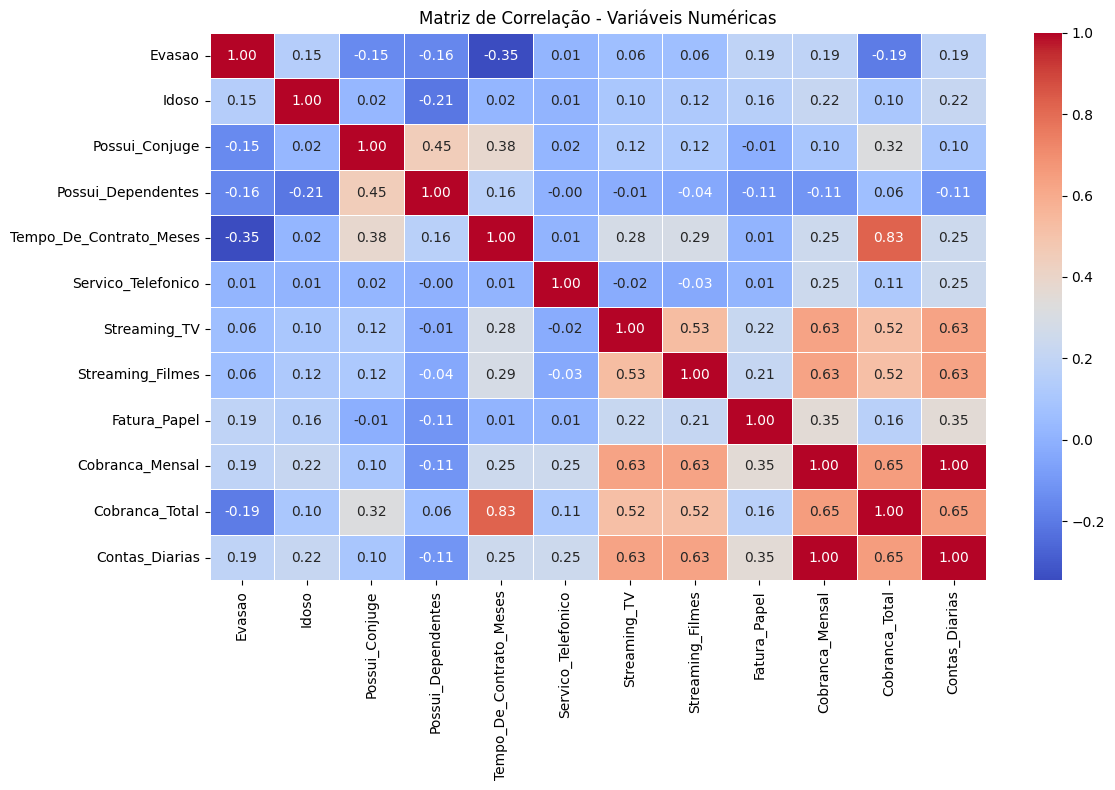

In [517]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacao, annot=True,
            cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação - Variáveis Numéricas")
plt.tight_layout()
plt.show()

### Análises Direcionadas
Descrição: 
- Investigue como variáveis específicas se relacionam com a evasão, como:

- Tempo de contrato × Evasão

- Total gasto × Evasão

- Utilize gráficos como boxplots ou dispersão (scatter plots) para visualizar padrões e possíveis tendências.

In [518]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Evasao                   7256 non-null   float64
 1   Genero                   7256 non-null   object 
 2   Idoso                    7256 non-null   int64  
 3   Possui_Conjuge           7256 non-null   int64  
 4   Possui_Dependentes       7256 non-null   int64  
 5   Tempo_De_Contrato_Meses  7256 non-null   int64  
 6   Servico_Telefonico       7256 non-null   int64  
 7   Tipo_Internet            7256 non-null   object 
 8   Streaming_TV             7256 non-null   float64
 9   Streaming_Filmes         7256 non-null   float64
 10  Tipo_Contrato            7256 non-null   object 
 11  Fatura_Papel             7256 non-null   int64  
 12  Metodo_Pagamento         7256 non-null   object 
 13  Cobranca_Mensal          7256 non-null   float64
 14  Cobranca_Total          

#### Tempo de Contrato por meses × Evasão

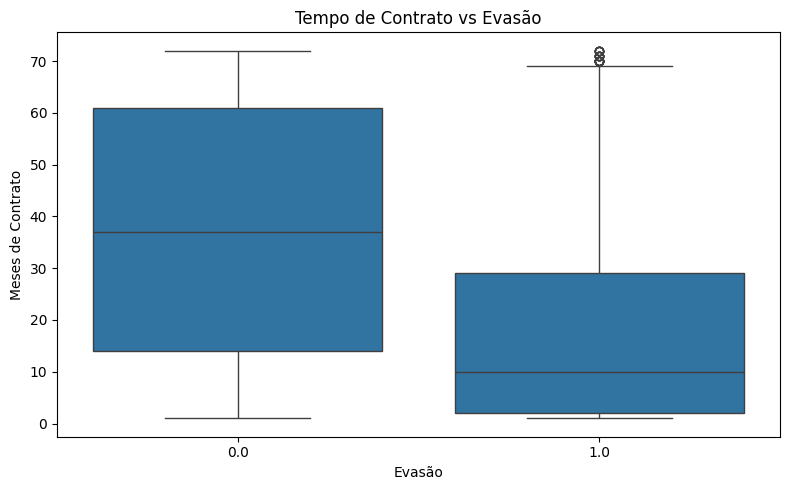

In [519]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=dados, x='Evasao', y='Tempo_De_Contrato_Meses')
plt.title('Tempo de Contrato vs Evasão')
plt.xlabel('Evasão')
plt.ylabel('Meses de Contrato')
plt.tight_layout()
plt.show()

#### Tobrança total × Evasão

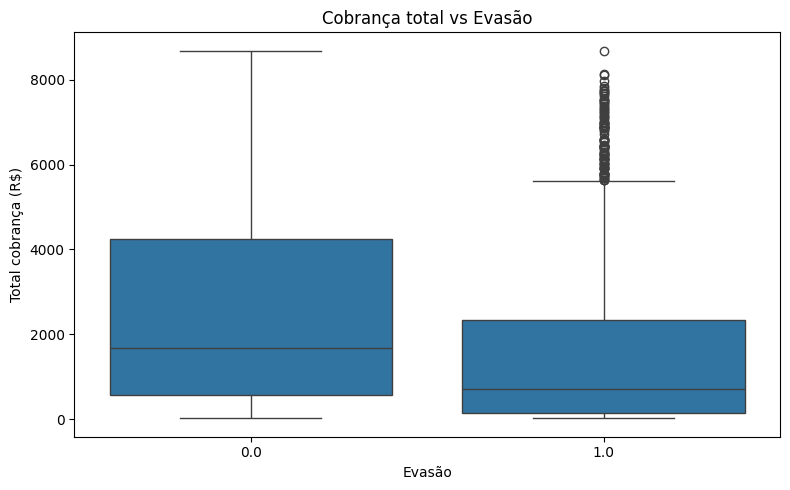

In [520]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=dados, x='Evasao', y='Cobranca_Total')
plt.title('Cobrança total vs Evasão')
plt.xlabel('Evasão')
plt.ylabel('Total cobrança (R$)')
plt.tight_layout()
plt.show()

#### Genero × Evasão

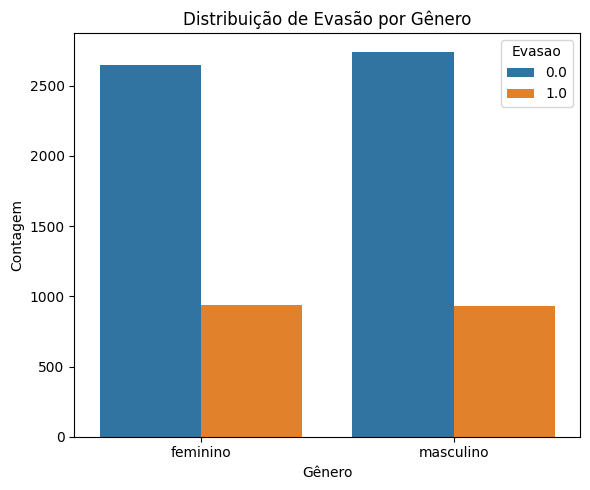

In [521]:
plt.figure(figsize=(6, 5))
sns.countplot(data=dados, x='Genero', hue='Evasao')
plt.title('Distribuição de Evasão por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

####  Histogramas por grupo de evasão

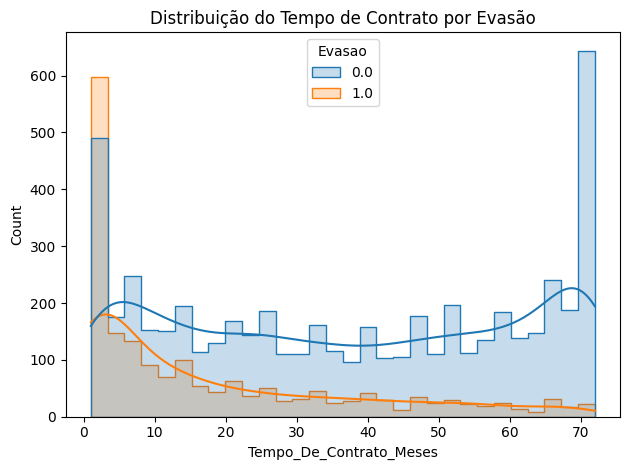

In [522]:
sns.histplot(data=dados, x='Tempo_De_Contrato_Meses', hue='Evasao',
             bins=30, kde=True, element='step')
plt.title('Distribuição do Tempo de Contrato por Evasão')
plt.tight_layout()
plt.show()

#### Comparação entre os Modelos
Com base na avaliação utilizando as métricas de Acurácia, Precisão, Recall e F1-Score, os modelos se comportaram da seguinte forma:

| Modelo            | Acurácia | Precisão | Recall | F1-Score |
|-------------------|----------|----------|--------|----------|
| KNN               | 0.7616   | 0.5449   | 0.4545 | 0.4956   |
| Random Forest     | 0.7859   | 0.6063   | 0.4831 | 0.5377   |
| Árvore de Decisão | 0.7271   | 0.4698   | 0.4581 | 0.4639   |
| Dummy             | 0.7423   | 0.0000   | 0.0000 | 0.0000   |

Análise dos Resultados
- Random Forest foi o modelo com melhor desempenho geral. Apresentou boa precisão e f1-score, além de um equilíbrio entre acurácia e capacidade de generalização.

- KNN teve desempenho razoável, porém um pouco inferior ao Random Forest, principalmente no recall, o que pode indicar dificuldade em identificar os casos de evasão corretamente.

- Árvore de Decisão teve desempenho inferior, o que pode sugerir overfitting em alguns casos ou baixa capacidade de generalização.

- O modelo Dummy apenas serve como comparação base. Como ele sempre prevê a classe mais frequente, teve f1-score zero, o que indica que qualquer modelo real é melhor do que ele.

Overfitting ou Underfitting?

- Não houve sinais evidentes de overfitting nos modelos, mas se a diferença entre desempenho no treino e no teste fosse muito grande, seria um indicativo.

- A Árvore de Decisão pode estar levemente underfit, sugerindo que ajustes de profundidade ou critérios de divisão seriam necessários.

### Conclusão
A análise dos modelos para prever a evasão de clientes mostrou que o Random Forest apresentou o melhor desempenho geral, equilibrando bem as métricas de acurácia, precisão, recall e F1-score. Modelos como KNN e Árvore de Decisão tiveram desempenho inferior, e o Dummy Classifier evidenciou o ganho real dos modelos preditivos ao superar o baseline ingênuo.

Fatores que mais influenciam a evasão:
Com base na análise de importância das variáveis pelo Random Forest e nos coeficientes da Regressão Logística, destacam-se como principais fatores que afetam a evasão:

- Tipo de Contrato: Clientes com contratos de curto prazo ou que utilizam planos mensais tendem a evadir mais.

-Tempo de Contrato (Meses): Clientes com menor tempo de contrato apresentam maior probabilidade de evasão.

-Tipo de Internet e Método de Pagamento: Algumas modalidades ou métodos indicam maior risco de cancelamento.

- Gênero: Pode haver variações pequenas, mas não tão expressivas quanto os fatores acima.

Estratégias de retenção sugeridas:
-Oferecer planos com maior fidelidade e benefícios para contratos de longo prazo, incentivando clientes a permanecerem.

- Personalizar ofertas para grupos de risco identificados, como clientes com contratos mensais ou métodos de pagamento específicos.

- Campanhas de comunicação focadas em clientes com baixo tempo de contrato, com promoções ou suporte para melhorar a experiência.

- Monitoramento contínuo das variáveis mais impactantes, com atualizações frequentes do modelo para capturar mudanças no comportamento.